## **Identificação de um modelo (Motor Gerador) de primeira ordem em torno de um ponto de operação**
### Professor: Cleison Silva
### Alunos:
>> ####            Oséias Dias de Farias
>> ####            Thalia Barroso
>> ####            Andrez Miller

___

### **Objetivo:**

- Encontrar, analisar e validar uma função de transferência de primeira ordem para a Planta Motor-Gerador.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import control as ct
import scipy.signal as sg
from control.matlab import *

%config InlineBackend.figure_format='retina'

In [2]:
dados = pd.read_csv("../dados/piano_Onda_Quadrada_Exemplo.csv", header = None).values
dados

array([[ 0.        ,  0.02      ,  0.04      , ..., 14.94      ,
        14.96      , 14.98      ],
       [ 8.        ,  8.        ,  8.        , ...,  8.        ,
         8.        ,  8.        ],
       [ 0.        ,  0.        ,  0.        , ...,  2.57      ,
         2.57      ,  2.57      ],
       [ 0.02300167,  0.02000022,  0.020998  , ...,  0.03238726,
         0.03123212,  0.03124857]])

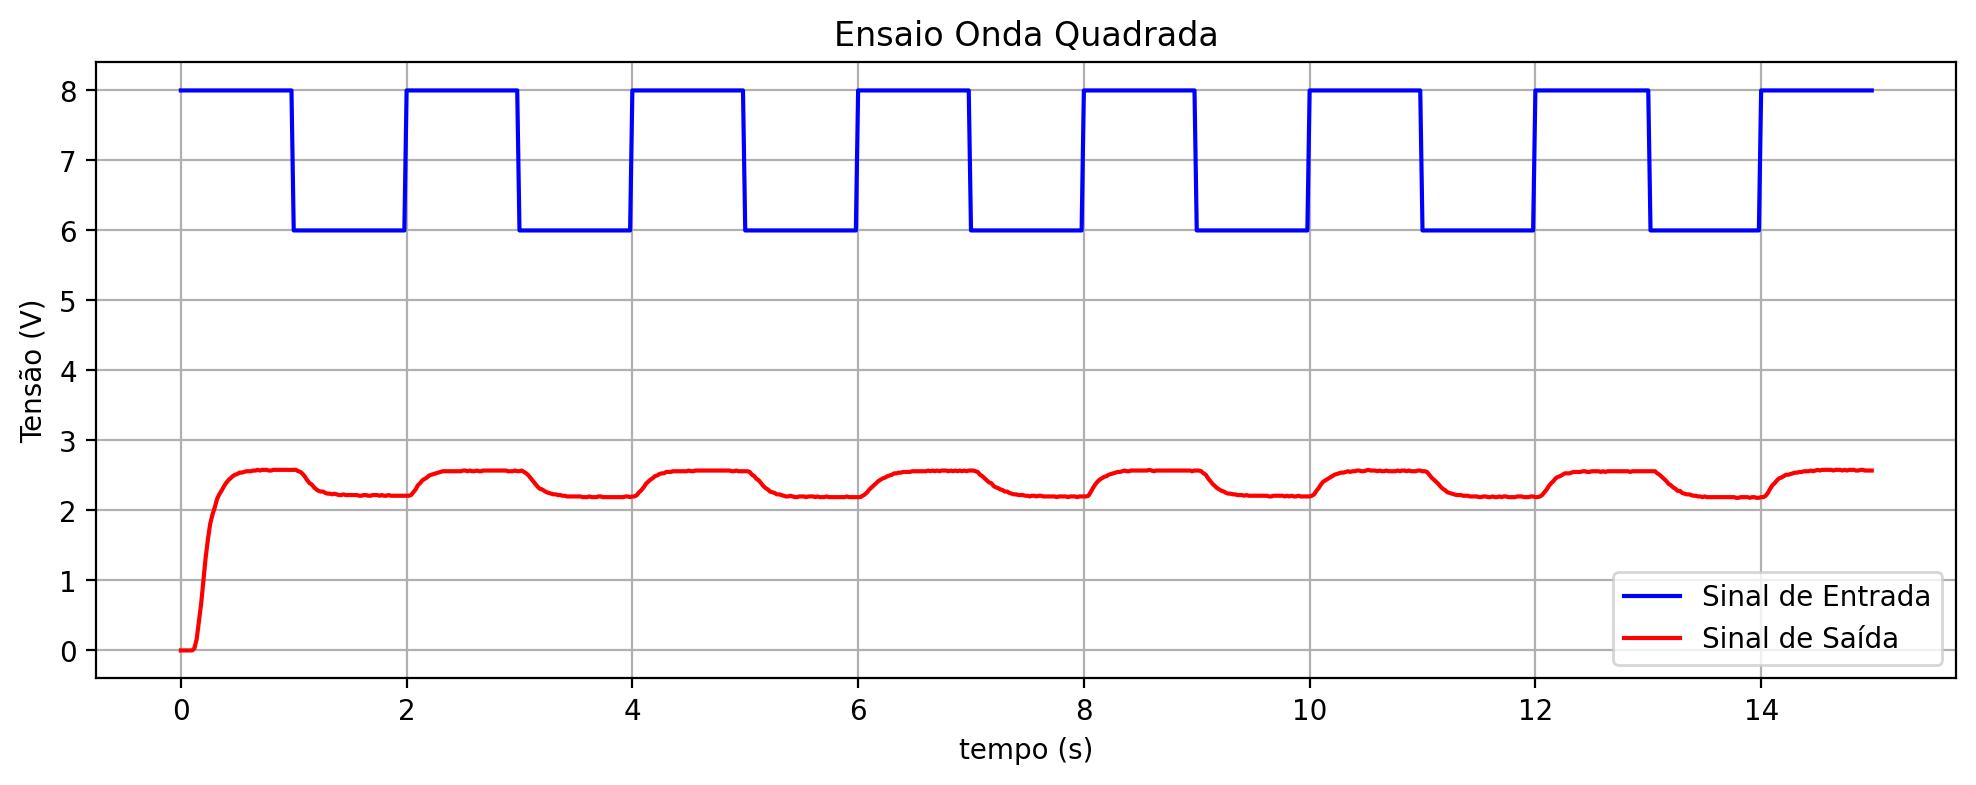


 Periodo de Amostragem: 0.027902403831481886


In [3]:
# Dados
tempo = dados[0, :]
sinal_entrada  = dados[1, :]
sinal_saida = dados[2, :]
toc = dados[3, :]

plt.figure(figsize=(12, 4))
plt.plot(tempo, sinal_entrada, c = 'b', label = "Sinal de Entrada")
plt.plot(tempo, sinal_saida, c = 'r', label = "Sinal de Saída")

plt. title('Ensaio Onda Quadrada')
plt.ylabel('Tensão (V)')
plt.xlabel('tempo (s)')
plt.legend()
plt.grid()
plt.show()

# plt.figure()
# plt.plot(tempo,toc)
# plt.show()

Ts = np.mean(toc)
print('\n','Periodo de Amostragem:', Ts)

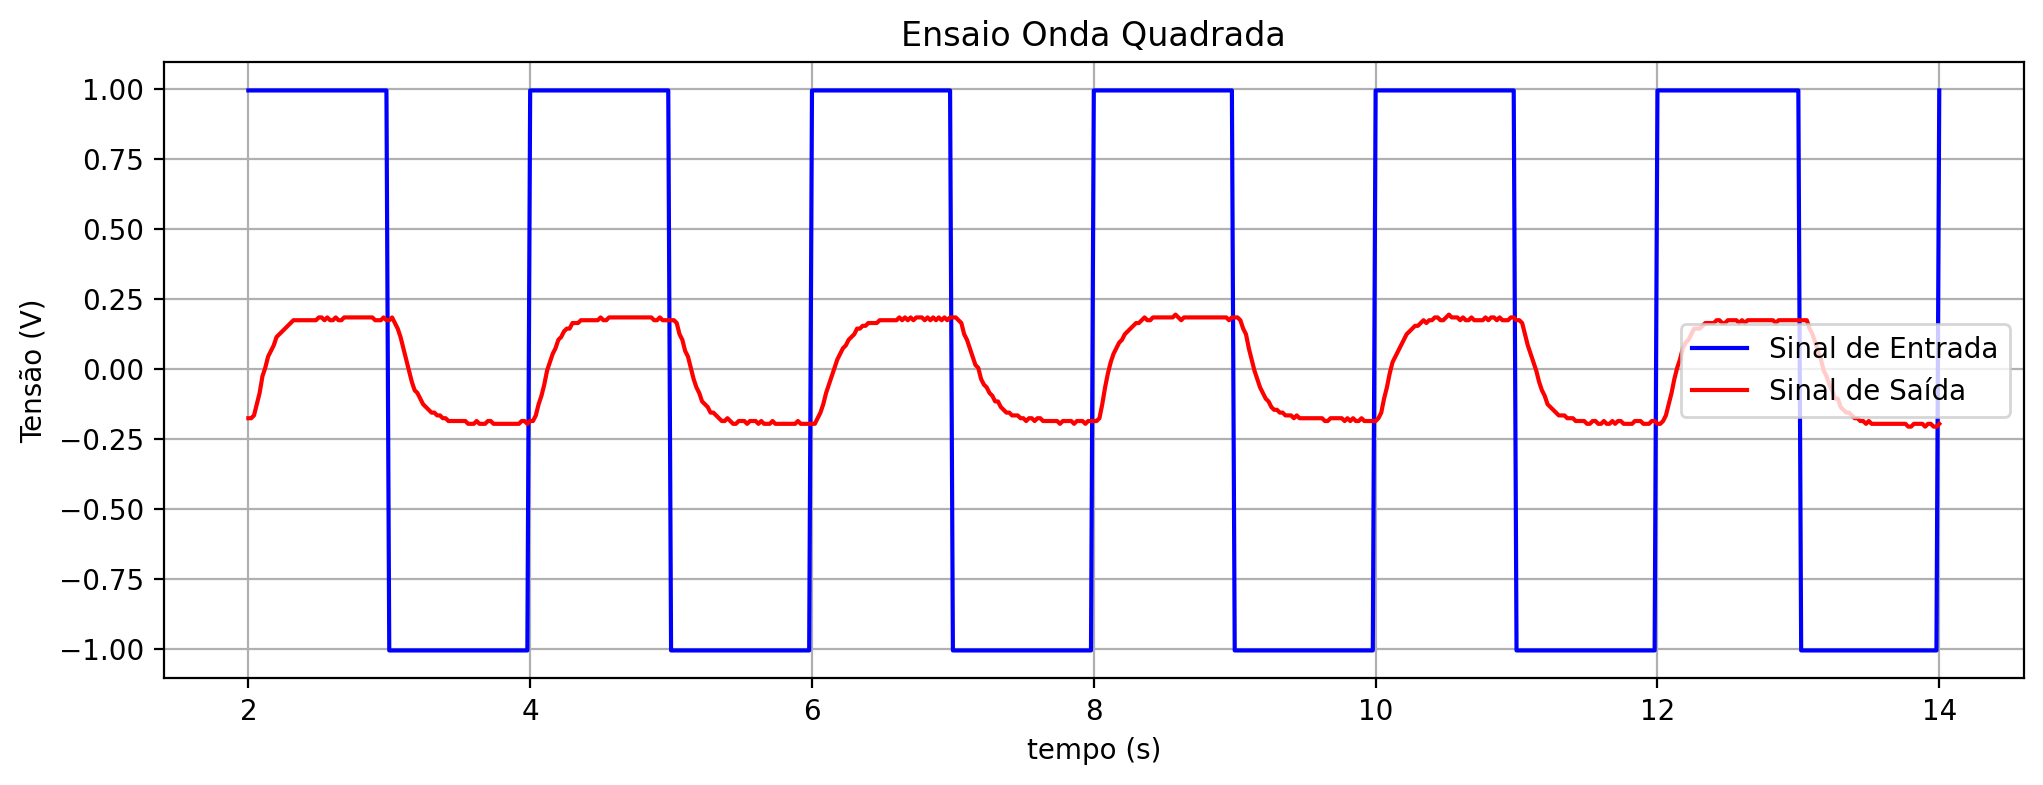

Nivel DC entrada: 7.004991680532446
Nivel DC saída: 2.385623960066556


In [4]:
# Define janela que despreza os primeiros instantes do ensaio

janela = (tempo>2) & (tempo<14)

# Obtendo o nível DC da entrada
nivel_dc_entrada = np.mean(sinal_entrada[janela])

# Obtendo o nível DC da saída
nivel_dc_saida = np.mean(sinal_saida[janela])

# Remove Nivel DC da Entrada e da Saída
r = sinal_entrada - nivel_dc_entrada
y = sinal_saida - nivel_dc_saida

# Plotagem dos gráficos dos sinais de entrada e saída sem nível DC
plt.figure(figsize=(12, 4))
plt.plot(tempo[janela],r[janela], c = 'b', label = "Sinal de Entrada")
plt.plot(tempo[janela],y[janela], c = 'r', label = "Sinal de Saída")

plt. title('Ensaio Onda Quadrada')
plt.ylabel('Tensão (V)')
plt.xlabel('tempo (s)')
plt.legend()
plt.grid()
plt.show()

print("Nivel DC entrada:" , nivel_dc_entrada )
print("Nivel DC saída:" , nivel_dc_saida )



Ganho do Sistema
Valores de Km : [0.18, 0.19, 0.19, 0.195, 0.19, 0.185]


Constante de Tempo do Sistema

Valores de tau : [0.15, 0.155, 0.185, 0.14, 0.155, 0.165]


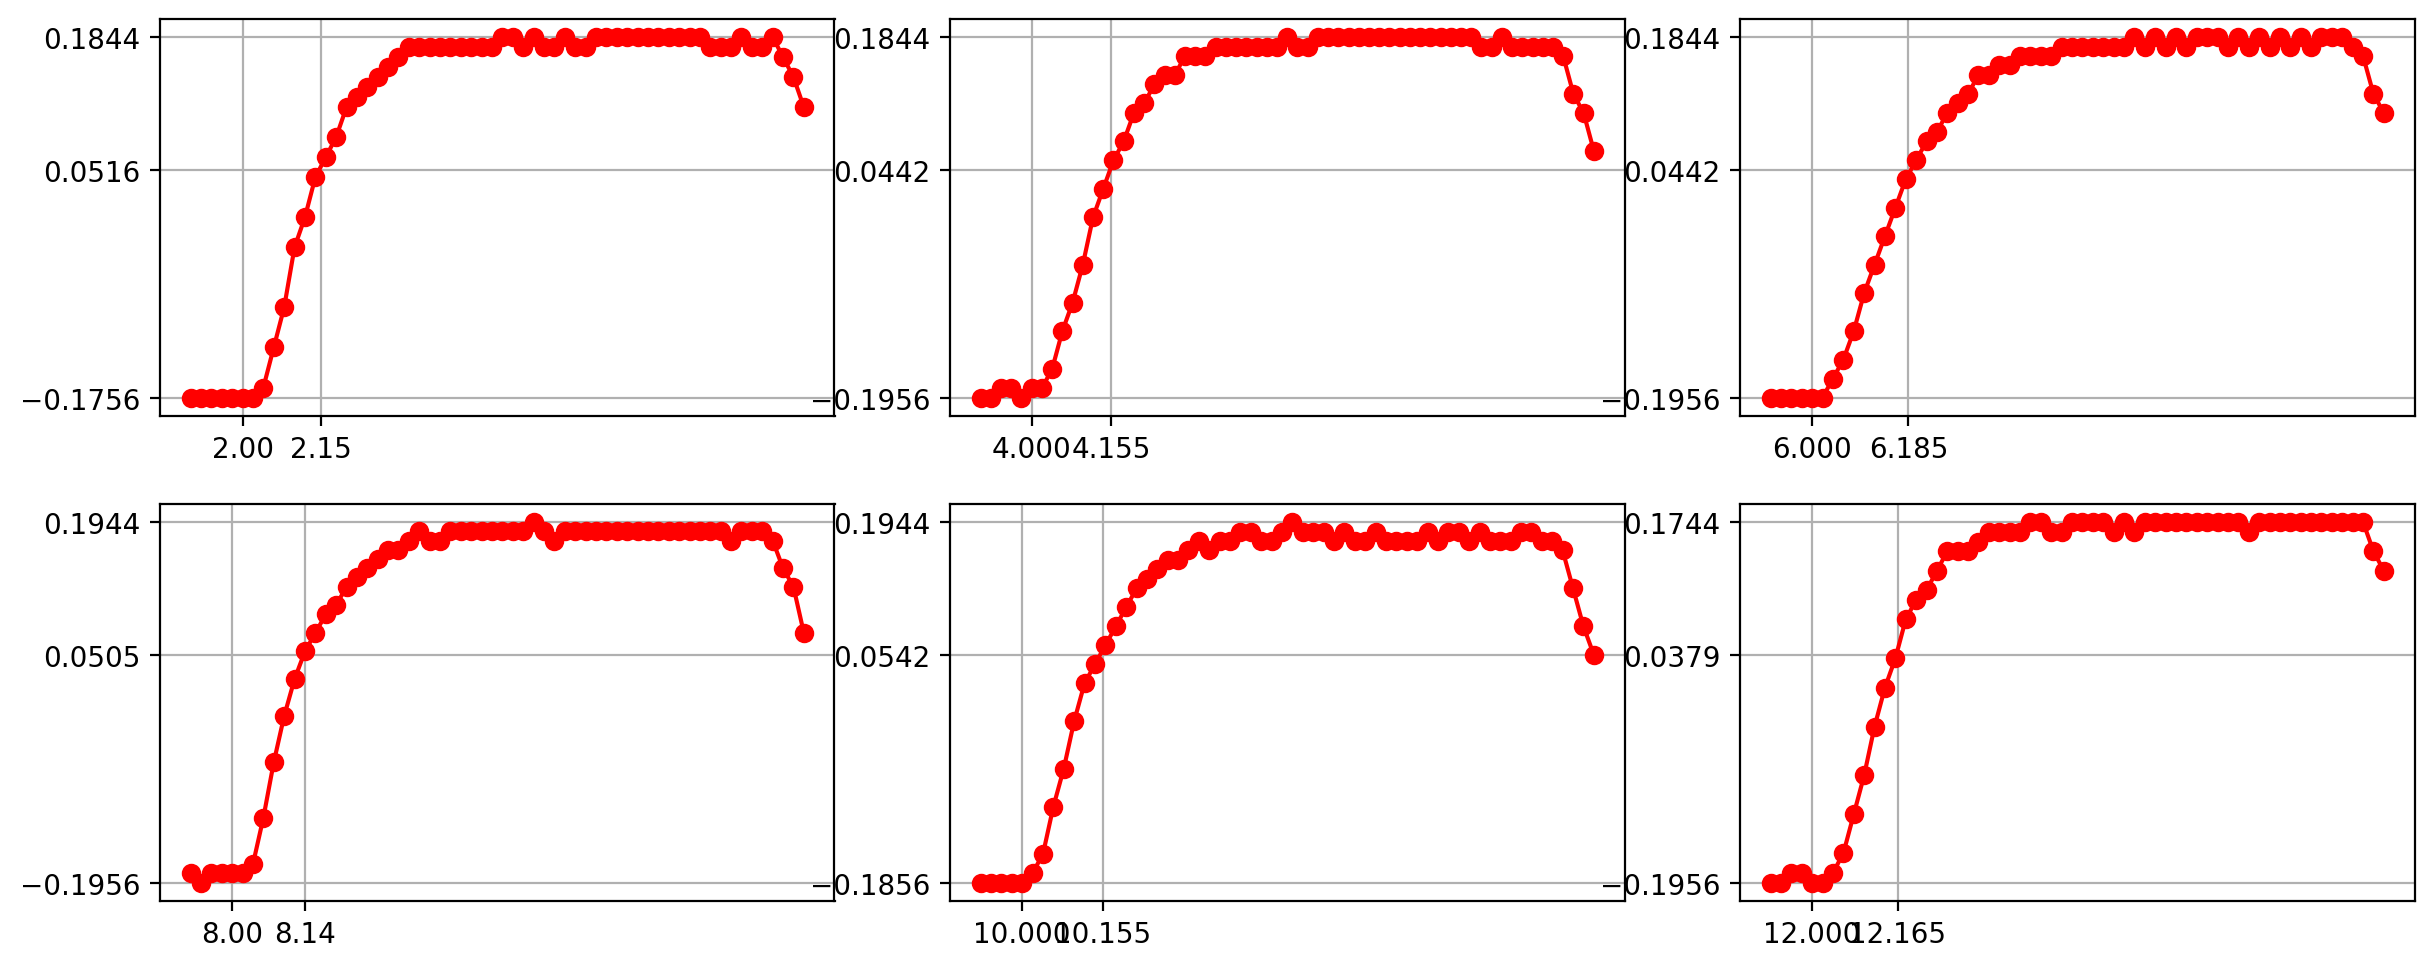

In [5]:
# Função para obter os valores de cada variação do sinal de saída
def calculo_km_tau(tempo, y, inicio=3.9, fim=5.1):
    index = (tempo > inicio) & (tempo < fim)
    t = tempo[index]
    y = y[index]
    ymin = np.min(y)
    ymax = np.max(y)

    delta_y = abs(ymax - ymin)
    ytau = (0.6312*delta_y) + ymin

    return [t, y], [ytau, delta_y, ymin, ymax]

# Obtendo os intervalos de subida do sinal de saída para plotagens
ty1, ymm1 = calculo_km_tau(tempo, y, inicio=1.9, fim=3.1)
km1 = ymm1[1]/2.

ty2, ymm2 = calculo_km_tau(tempo, y, inicio=3.9, fim=5.1)
km2 = ymm2[1]/2.

ty3, ymm3 = calculo_km_tau(tempo, y, inicio=5.9, fim=7.1)
km3 = ymm3[1]/2.

ty4, ymm4 = calculo_km_tau(tempo, y, inicio=7.9, fim=9.1)
km4 = ymm4[1]/2.

ty5, ymm5 = calculo_km_tau(tempo, y, inicio=9.9, fim=11.1)
km5 = ymm5[1]/2.

ty6, ymm6 = calculo_km_tau(tempo, y, inicio=11.9, fim=13.1)
km6 = ymm6[1]/2.

print("\n\nGanho do Sistema")
kms = [km1, km2, km3, km4, km5, km6]
print(f"Valores de Km : {[round(km, 5) for km in kms]}")

print("\n\nConstante de Tempo do Sistema\n")
taus = [0.150, 0.155, 0.185, 0.140, 0.155, 0.165]
print(f"Valores de tau : {taus}")

# Subgráficos de cada intervalo de subida do sinal de saída
fig, ax = plt.subplots(2, 3, figsize=(12, 5))
plt.tight_layout()
ax[0, 0].plot(ty1[0], ty1[1], '-or')
ax[0, 0].set_yticks([ymm1[2], ymm1[0], ymm1[3]])
ax[0, 0].set_xticks([2, 2.150])
ax[0, 0].grid()


ax[0, 1].plot(ty2[0], ty2[1], '-or')
ax[0, 1].set_yticks([ymm2[2], ymm2[0], ymm2[3]])
ax[0, 1].set_xticks([4, 4.155])
ax[0, 1].grid()

ax[0, 2].plot(ty3[0], ty3[1], '-or')
ax[0, 2].set_yticks([ymm3[2], ymm3[0], ymm3[3]])
ax[0, 2].set_xticks([6, 6.185])
ax[0, 2].grid()

ax[1, 0].plot(ty4[0], ty4[1], '-or')
ax[1, 0].set_yticks([ymm4[2], ymm4[0], ymm4[3]])
ax[1, 0].set_xticks([8, 8.140])
ax[1, 0].grid()

ax[1, 1].plot(ty5[0], ty5[1], '-or')
ax[1, 1].set_yticks([ymm5[2], ymm5[0], ymm5[3]])
ax[1, 1].set_xticks([10, 10.155])
ax[1, 1].grid()

ax[1, 2].plot(ty6[0], ty6[1], '-or')
ax[1, 2].set_yticks([ymm6[2], ymm6[0], ymm6[3]])
ax[1, 2].set_xticks([12, 12.165])
ax[1, 2].grid()

plt.show()



Ganho do Sistema
Valores de Km : [0.19, 0.19, 0.19, 0.185, 0.19, 0.19]


Constante de Tempo do Sistema

Valores de tau : [0.165, 0.165, 0.2, 0.165, 0.165, 0.2]


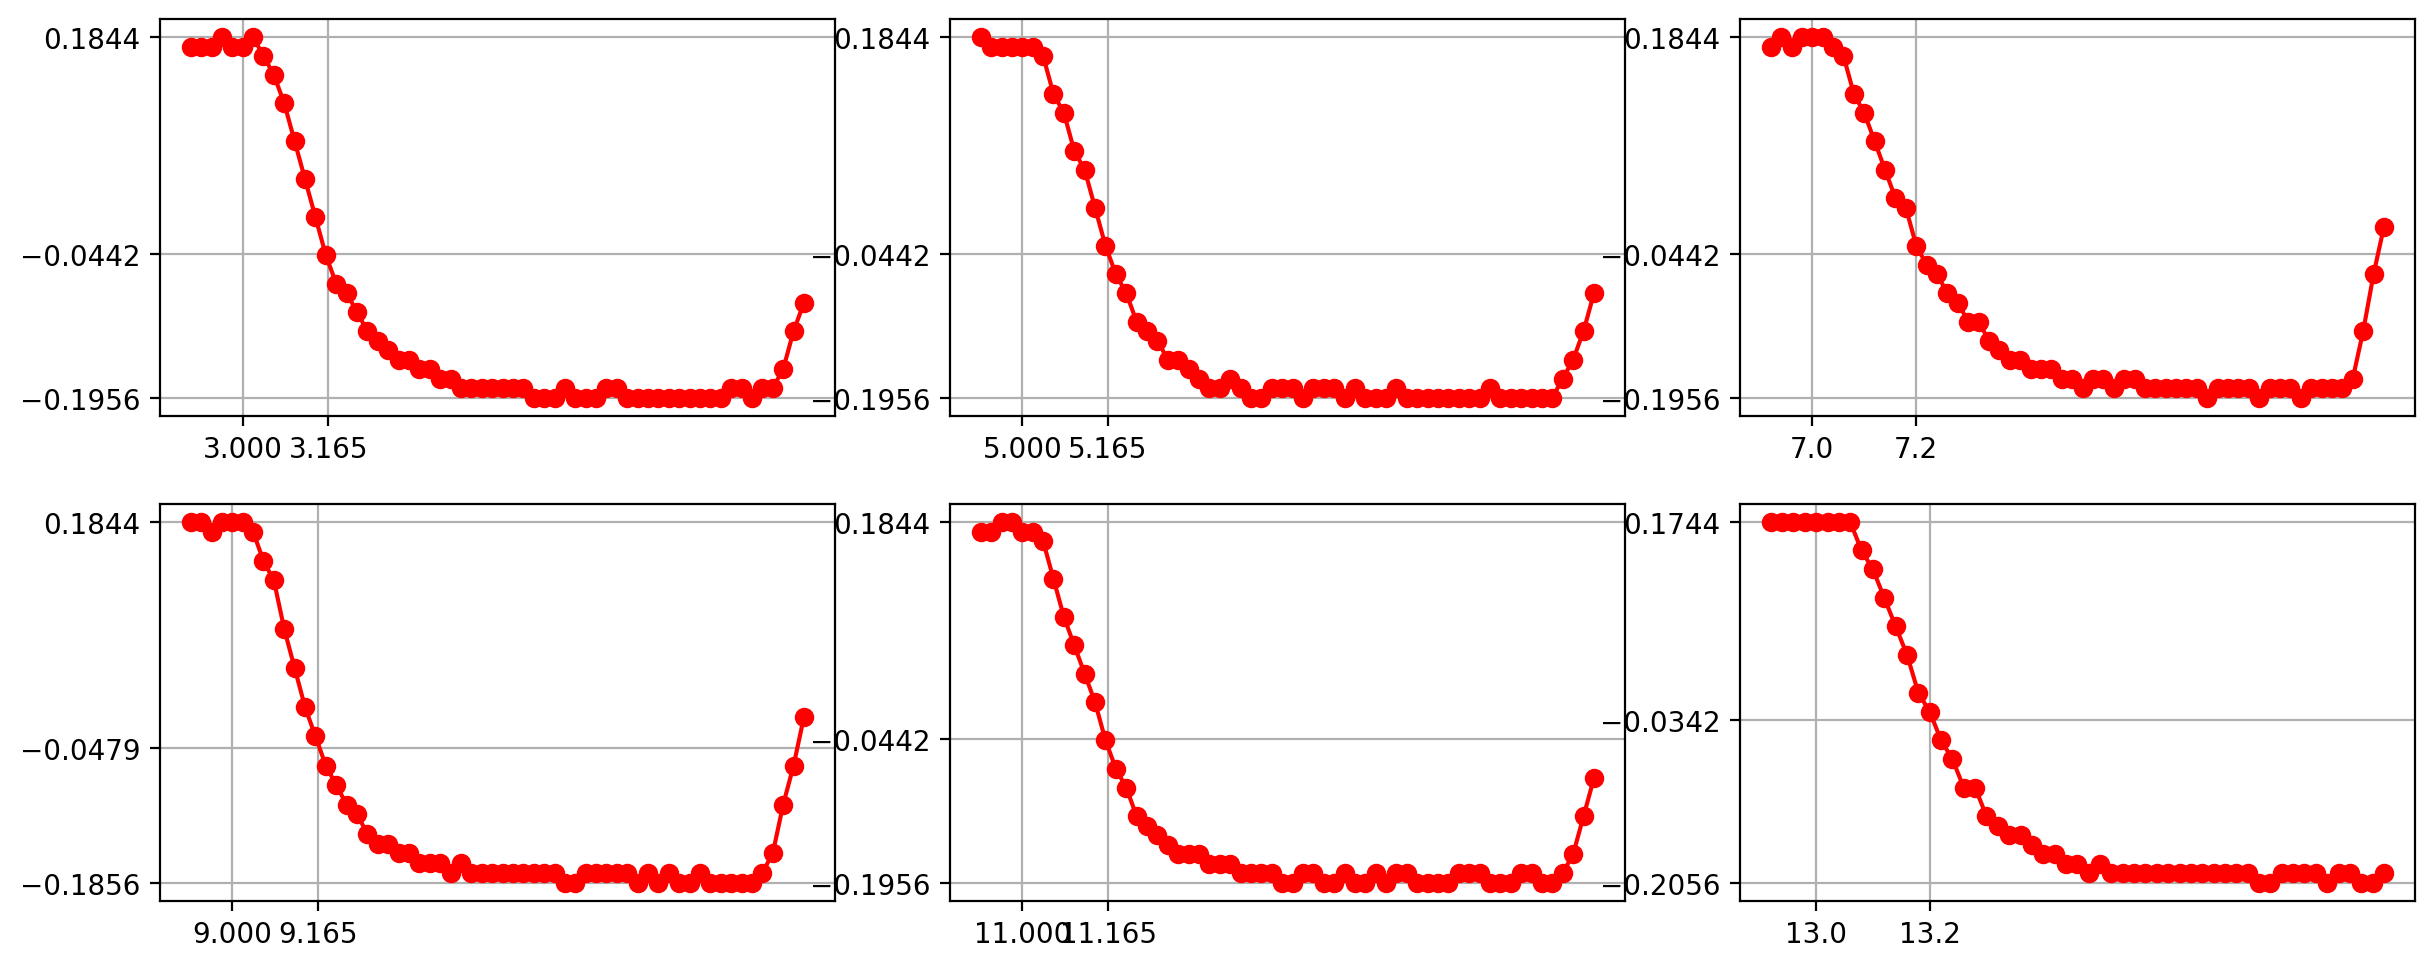

In [6]:
# Função para obter os valores de cada variação do sinal de saída
def calculo_km_tau1(tempo, y, inicio=2.9, fim=4.1):
    index = (tempo > inicio) & (tempo < fim)
    t = tempo[index]
    y = y[index]
    ymin = np.min(y)
    ymax = np.max(y)

    delta_y = abs(ymax - ymin)
    ytau = -((0.6312*delta_y) + ymin)

    return [t, y], [ytau, delta_y, ymin, ymax]

# Obtendo os intervalos de subida do sinal de saída para plotagens
ty_1, ymm_1 = calculo_km_tau1(tempo, y, inicio=2.9, fim=4.1)
km_1 = ymm_1[1]/2.

ty_2, ymm_2 = calculo_km_tau1(tempo, y, inicio=4.9, fim=6.1)
km_2 = ymm_2[1]/2.

ty_3, ymm_3 = calculo_km_tau1(tempo, y, inicio=6.9, fim=8.1)
km_3 = ymm_3[1]/2.

ty_4, ymm_4 = calculo_km_tau1(tempo, y, inicio=8.9, fim=10.1)
km_4 = ymm_4[1]/2.

ty_5, ymm_5 = calculo_km_tau1(tempo, y, inicio=10.9, fim=12.1)
km_5 = ymm_5[1]/2.

ty_6, ymm_6 = calculo_km_tau1(tempo, y, inicio=12.9, fim=14)
km_6 = ymm_6[1]/2.

print("\n\nGanho do Sistema")
k_ms = [km_1, km_2, km_3, km_4, km_5, km_6]
print(f"Valores de Km : {[round(km, 4) for km in k_ms]}")

print("\n\nConstante de Tempo do Sistema\n")
taus2 = [0.165, 0.165, 0.2, 0.165, 0.165, 0.2]
print(f"Valores de tau : {taus2}")

# Subgráficos de cada intervalo de subida do sinal de saída
fig, ax = plt.subplots(2, 3, figsize=(12, 5))
plt.tight_layout()
ax[0, 0].plot(ty_1[0], ty_1[1], '-or')
ax[0, 0].set_yticks([ymm_1[2], ymm_1[0], ymm_1[3]])
ax[0, 0].set_xticks([3, 3.165])
ax[0, 0].grid()

ax[0, 1].plot(ty_2[0], ty_2[1], '-or')
ax[0, 1].set_yticks([ymm_2[2], ymm_2[0], ymm_2[3]])
ax[0, 1].set_xticks([5, 5.165])
ax[0, 1].grid()

ax[0, 2].plot(ty_3[0], ty_3[1], '-or')
ax[0, 2].set_yticks([ymm_3[2], ymm_3[0], ymm_3[3]])
ax[0, 2].set_xticks([7, 7.2])
ax[0, 2].grid()

ax[1, 0].plot(ty_4[0], ty_4[1], '-or')
ax[1, 0].set_yticks([ymm_4[2], ymm_4[0], ymm_4[3]])
ax[1, 0].set_xticks([9, 9.165])
ax[1, 0].grid()

ax[1, 1].plot(ty_5[0], ty_5[1], '-or')
ax[1, 1].set_yticks([ymm_5[2], ymm_5[0], ymm_5[3]])
ax[1, 1].set_xticks([11, 11.165])
ax[1, 1].grid()

ax[1, 2].plot(ty_6[0], ty_6[1], '-or')
ax[1, 2].set_yticks([ymm_6[2], ymm_6[0], ymm_6[3]])
ax[1, 2].set_xticks([13, 13.2])
ax[1, 2].grid()

plt.show()

Ganho do sistema

In [7]:
km = (km1 + km2 + km3 + km4 + km5 + km6 + km_1 + km_2 + km_3 + km_4 + km_5 + km_6)/12.
print(f"\nGanho Km: {km}")


Ganho Km: 0.18874999999999995


Constante de tempo $\tau$

In [8]:
tau = (np.sum(taus) + np.sum(taus2))/12.
print(f"\nConstante de Tempo do sistema: {tau}")


Constante de Tempo do sistema: 0.1675


Função de Transferência do Modelo

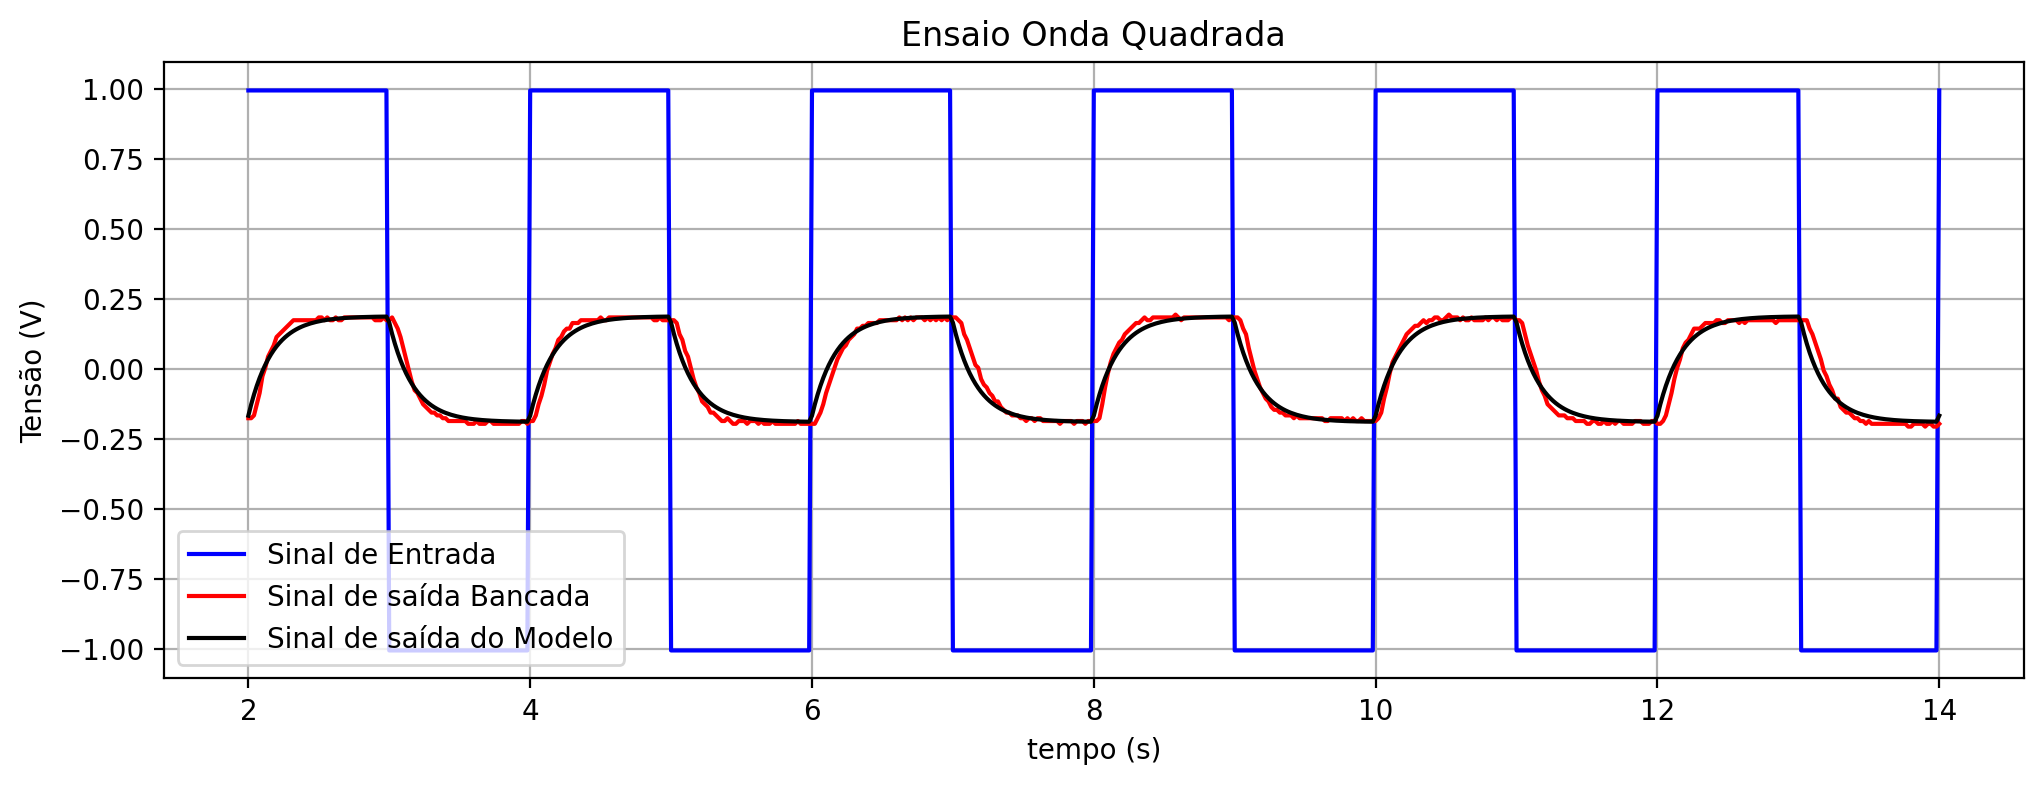

In [9]:
num = [km]
den = [tau, 1]

Gs = ct.tf(num, den)
tempo1, saida_modelo = ct.forced_response(Gs, T=tempo, U=sinal_entrada)


# Tirando a média para subtrair o Nível DC do modelo
nivel_dc_modelo = np.mean(saida_modelo[janela])
saida_sem_dc_modelo = saida_modelo[janela] - nivel_dc_modelo

# Plotagem dos gráficos dos sinais de entrada e saída sem nível DC
plt.figure(figsize=(12, 4))
plt.plot(tempo[janela],r[janela], c = 'b', label = "Sinal de Entrada")
plt.plot(tempo[janela], y[janela], 'r', label = "Sinal de saída Bancada")
plt.plot(tempo[janela], saida_sem_dc_modelo, 'k', label = "Sinal de saída do Modelo")

plt. title('Ensaio Onda Quadrada')
plt.ylabel('Tensão (V)')
plt.xlabel('tempo (s)')
plt.legend()
plt.grid()
plt.show()


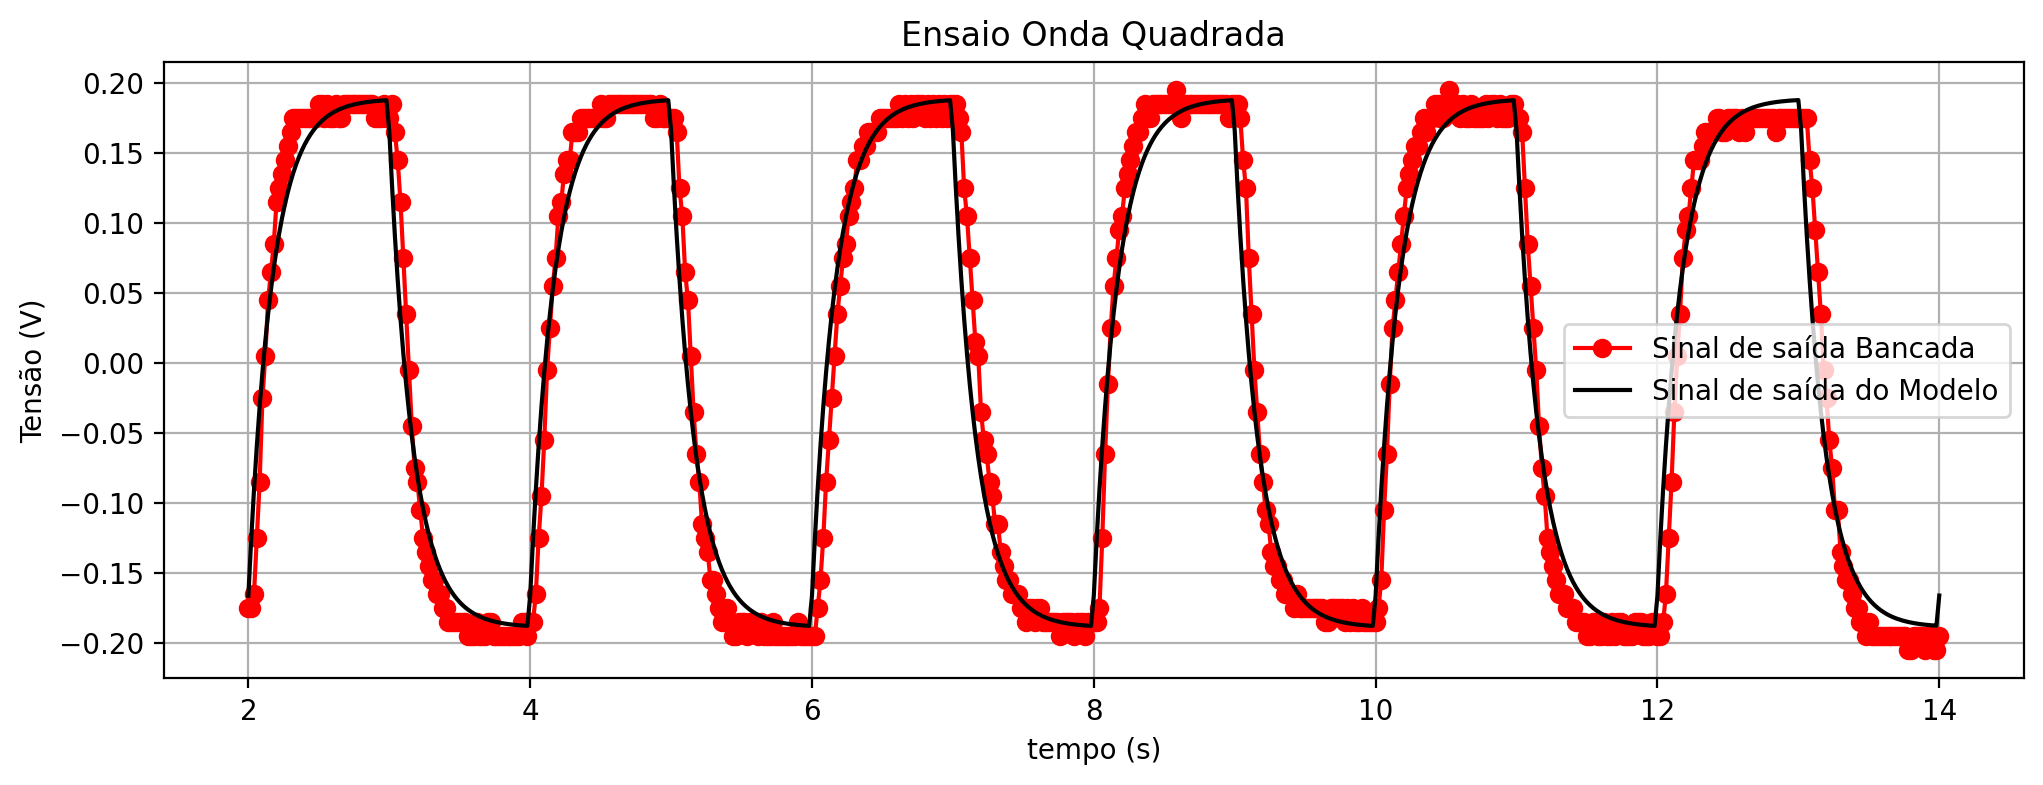

In [10]:
# Plotagem dos gráficos dos sinais de entrada e saída sem nível DC
plt.figure(figsize=(12, 4))
plt.plot(tempo[janela], y[janela], '-or', label = "Sinal de saída Bancada")
plt.plot(tempo[janela], saida_sem_dc_modelo, 'k', label = "Sinal de saída do Modelo")

plt. title('Ensaio Onda Quadrada')
plt.ylabel('Tensão (V)')
plt.xlabel('tempo (s)')
plt.legend()
plt.grid()
plt.show()

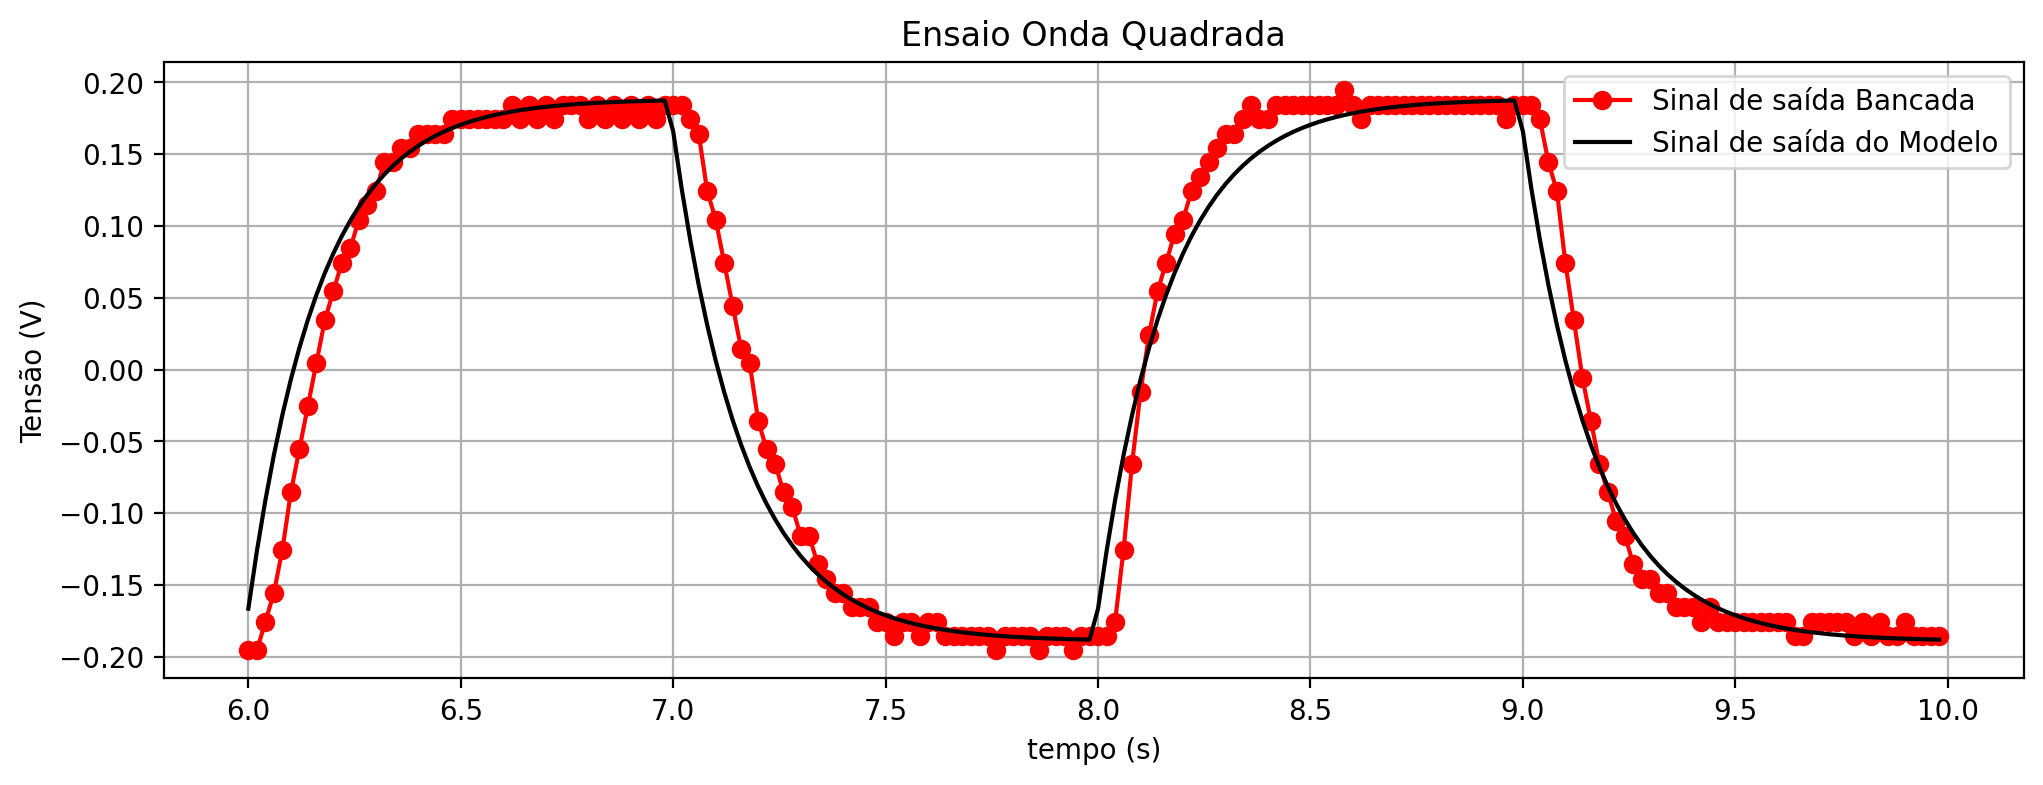

In [11]:
# Plotagem dos gráficos dos sinais de entrada e saída sem nível DC
plt.figure(figsize=(12, 4))
plt.plot(tempo[janela][200:400], y[janela][200:400], '-or', label = "Sinal de saída Bancada")
plt.plot(tempo[janela][200:400], saida_sem_dc_modelo[200:400], 'k', label = "Sinal de saída do Modelo")

plt. title('Ensaio Onda Quadrada')
plt.ylabel('Tensão (V)')
plt.xlabel('tempo (s)')
plt.legend()
plt.grid()
plt.show()

In [13]:
num = 0.2
den = [0.3, 1]

Gs = ct.tf(num, den)
Gs

TransferFunction(array([0.2]), array([0.3, 1. ]))

In [17]:
num1 = 15/7
den1 = [1]
Gc_s = ct.tf(num1, den1)
Gc_s

TransferFunction(array([2.14285714]), array([1]))

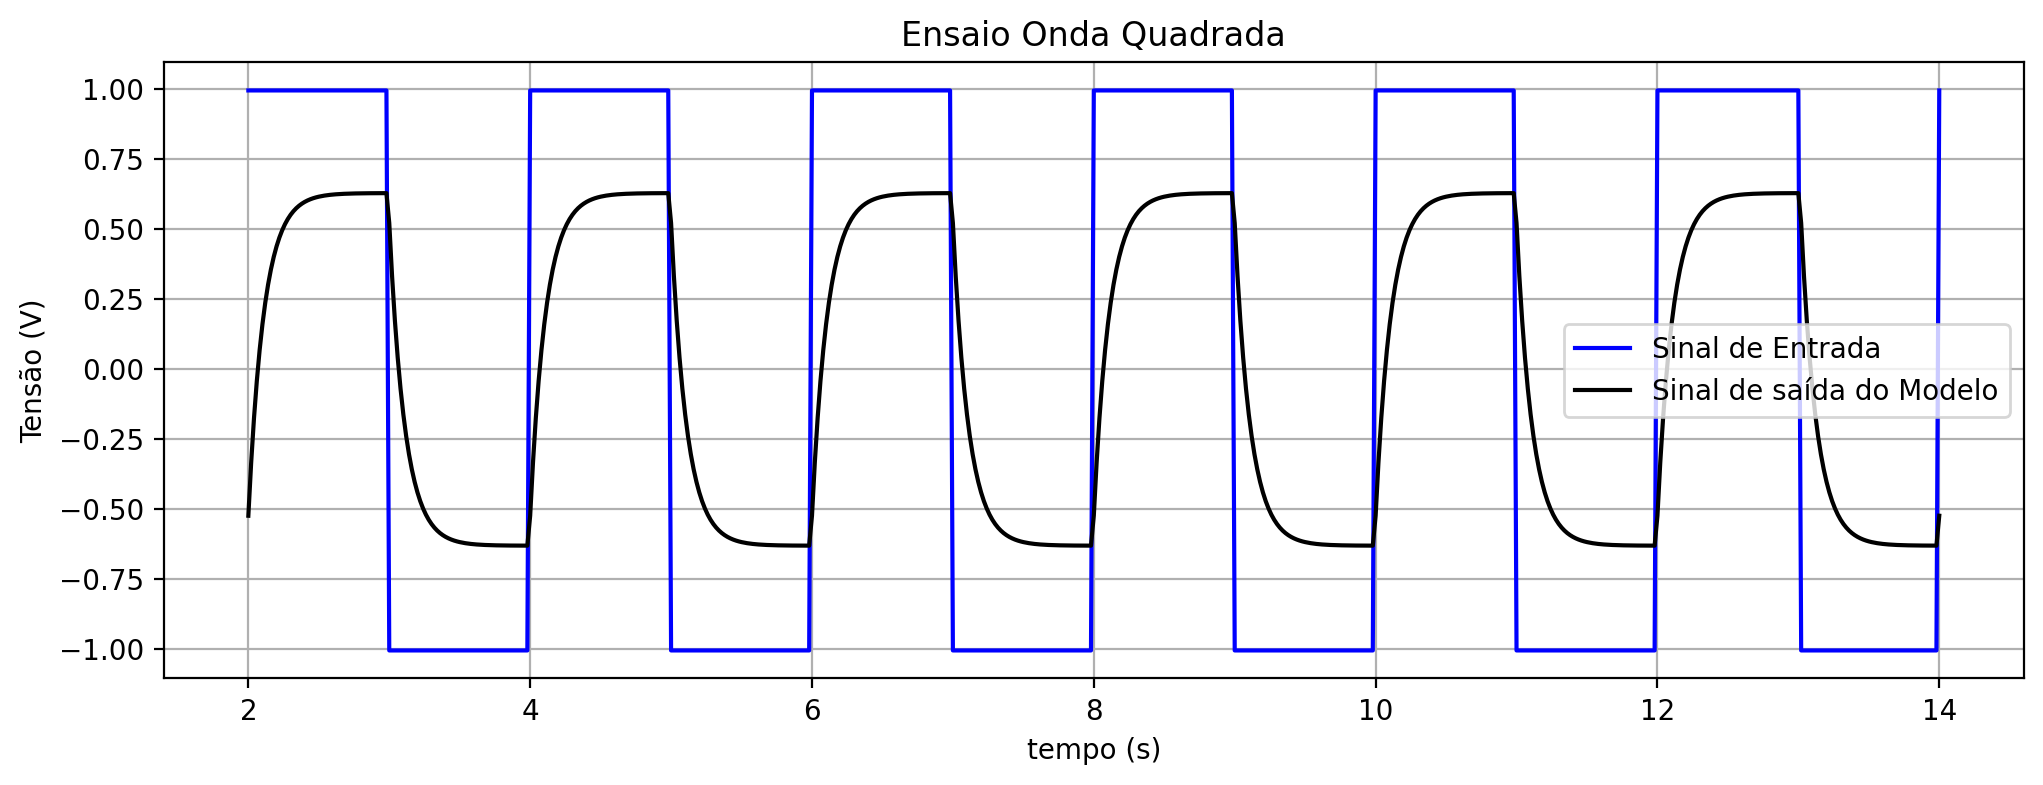

In [28]:
Gs_serie = ct.series(Gs, Gc_s)
Gs_serie
Gs_malha_fechada = ct.feedback(Gs_serie, 1, -1)
Gs_malha_fechada

tempo1, saida_modelo = ct.forced_response(Gs_malha_fechada, T=tempo, U=sinal_entrada)


# Tirando a média para subtrair o Nível DC do modelo
nivel_dc_modelo = np.mean(saida_modelo[janela])
saida_sem_dc_modelo = saida_modelo[janela] - nivel_dc_modelo

# Plotagem dos gráficos dos sinais de entrada e saída sem nível DC
plt.figure(figsize=(12, 4))
plt.plot(tempo[janela],r[janela], c = 'b', label = "Sinal de Entrada")
# plt.plot(tempo[janela], y[janela], 'r', label = "Sinal de saída Bancada")
plt.plot(tempo[janela], saida_sem_dc_modelo, 'k', label = "Sinal de saída do Modelo")

plt. title('Ensaio Onda Quadrada')
plt.ylabel('Tensão (V)')
plt.xlabel('tempo (s)')
plt.legend()
plt.grid()
plt.show()


Sinal de Controle

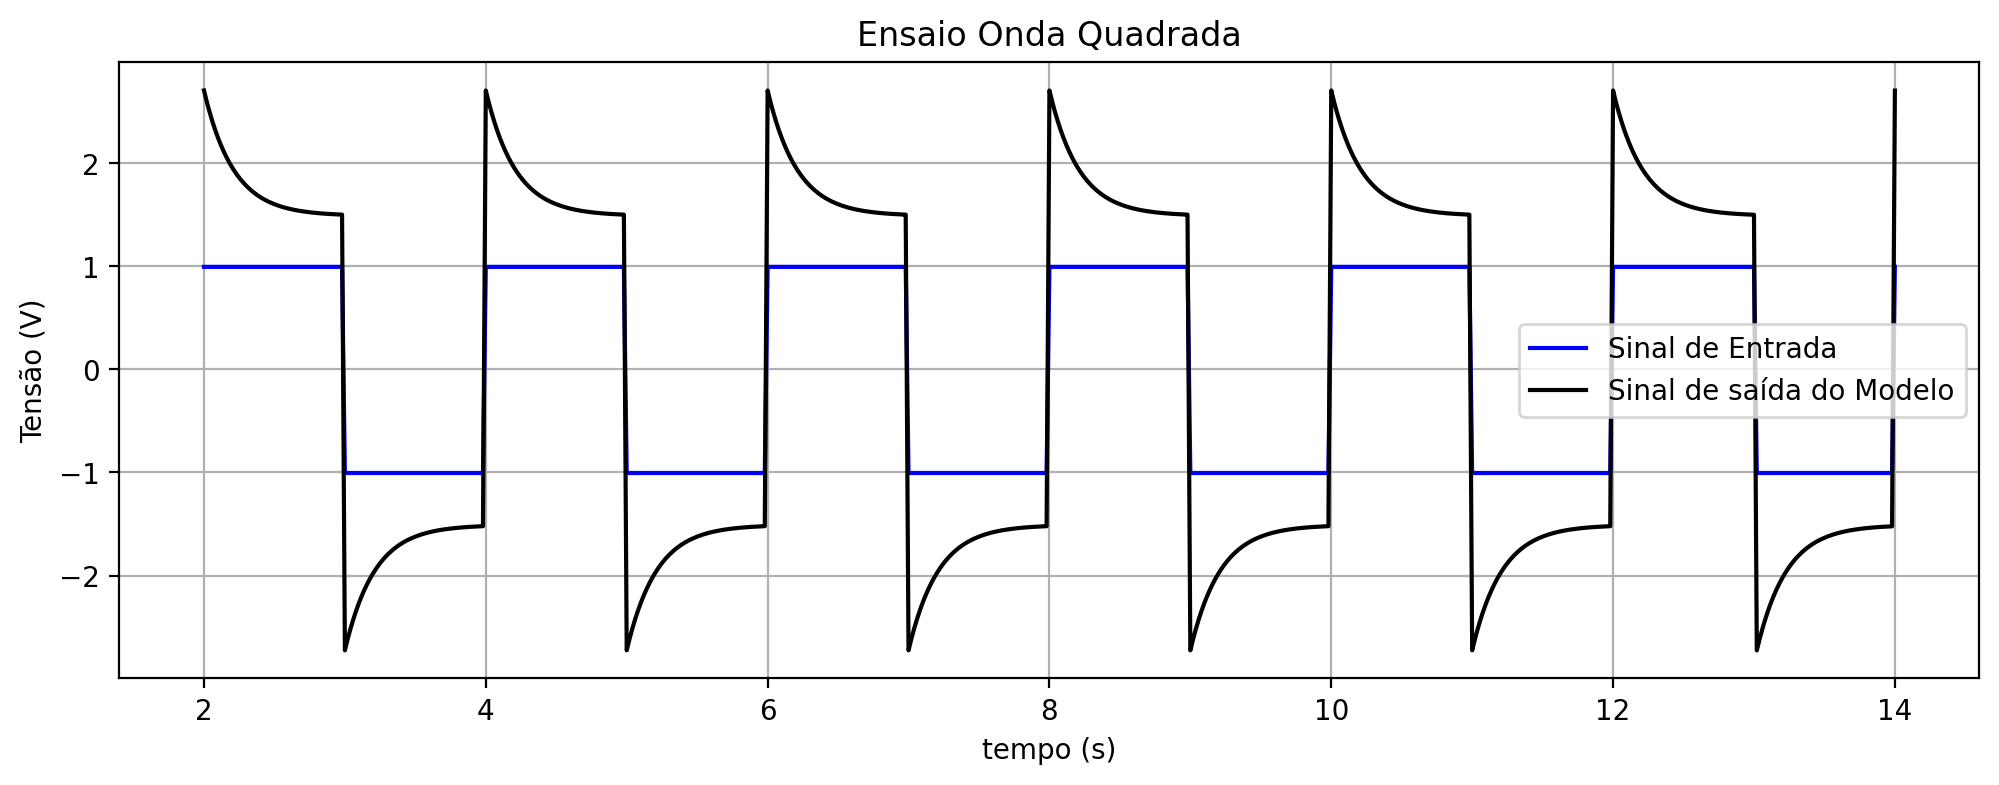

In [25]:
Us = ct.feedback(Gc_s, Gs, -1)

tempo1, saida_modelo = ct.forced_response(Us, T=tempo, U=sinal_entrada)


# Tirando a média para subtrair o Nível DC do modelo
nivel_dc_modelo = np.mean(saida_modelo[janela])
saida_sem_dc_modelo = saida_modelo[janela] - nivel_dc_modelo

# Plotagem dos gráficos dos sinais de entrada e saída sem nível DC
plt.figure(figsize=(12, 4))
plt.plot(tempo[janela],r[janela], c = 'b', label = "Sinal de Entrada")
# plt.plot(tempo[janela], y[janela], 'r', label = "Sinal de saída Bancada")
plt.plot(tempo[janela], saida_sem_dc_modelo, 'k', label = "Sinal de saída do Modelo")

plt. title('Ensaio Onda Quadrada')
plt.ylabel('Tensão (V)')
plt.xlabel('tempo (s)')
plt.legend()
plt.grid()
plt.show()

In [43]:
num1 = 9.5
den1 = [1]
Gc_s = ct.tf(num1, den1)
Gc_s

TransferFunction(array([9.5]), array([1]))

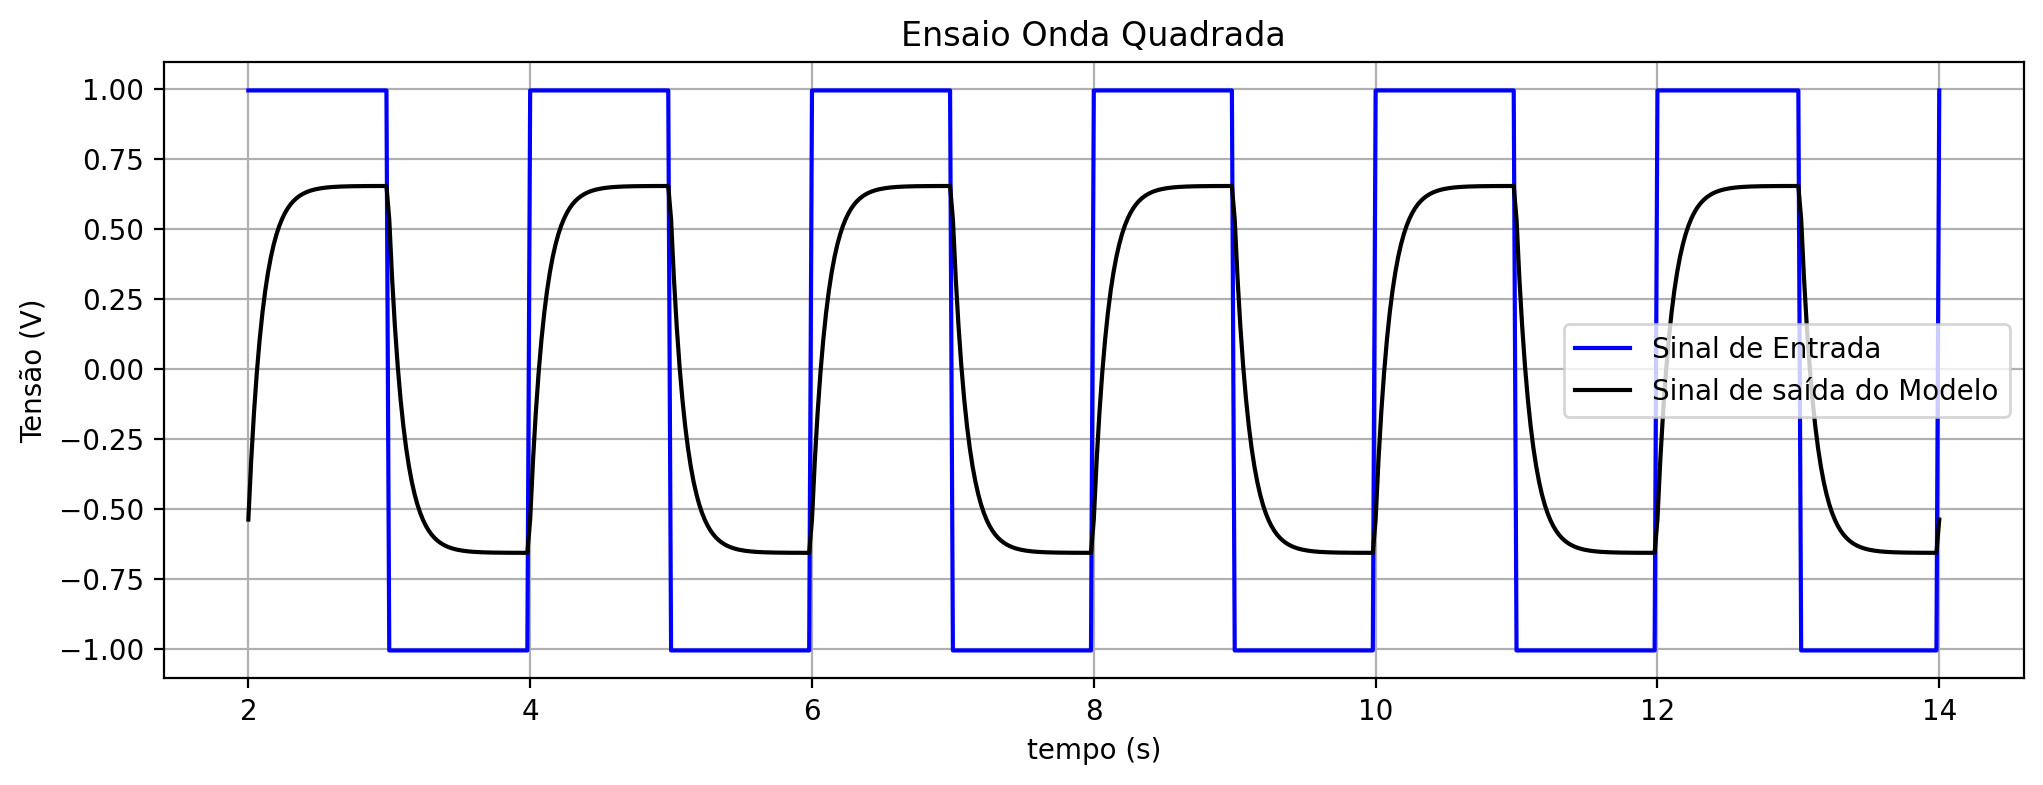

In [44]:
Gs_serie = ct.series(Gs, Gc_s)
Gs_serie
Gs_malha_fechada = ct.feedback(Gs_serie, 1, -1)
Gs_malha_fechada

tempo1, saida_modelo = ct.forced_response(Gs_malha_fechada, T=tempo, U=sinal_entrada)


# Tirando a média para subtrair o Nível DC do modelo
nivel_dc_modelo = np.mean(saida_modelo[janela])
saida_sem_dc_modelo = saida_modelo[janela] - nivel_dc_modelo

# Plotagem dos gráficos dos sinais de entrada e saída sem nível DC
plt.figure(figsize=(12, 4))
plt.plot(tempo[janela],r[janela], c = 'b', label = "Sinal de Entrada")
# plt.plot(tempo[janela], y[janela], 'r', label = "Sinal de saída Bancada")
plt.plot(tempo[janela], saida_sem_dc_modelo, 'k', label = "Sinal de saída do Modelo")

plt. title('Ensaio Onda Quadrada')
plt.ylabel('Tensão (V)')
plt.xlabel('tempo (s)')
plt.legend()
plt.grid()
plt.show()


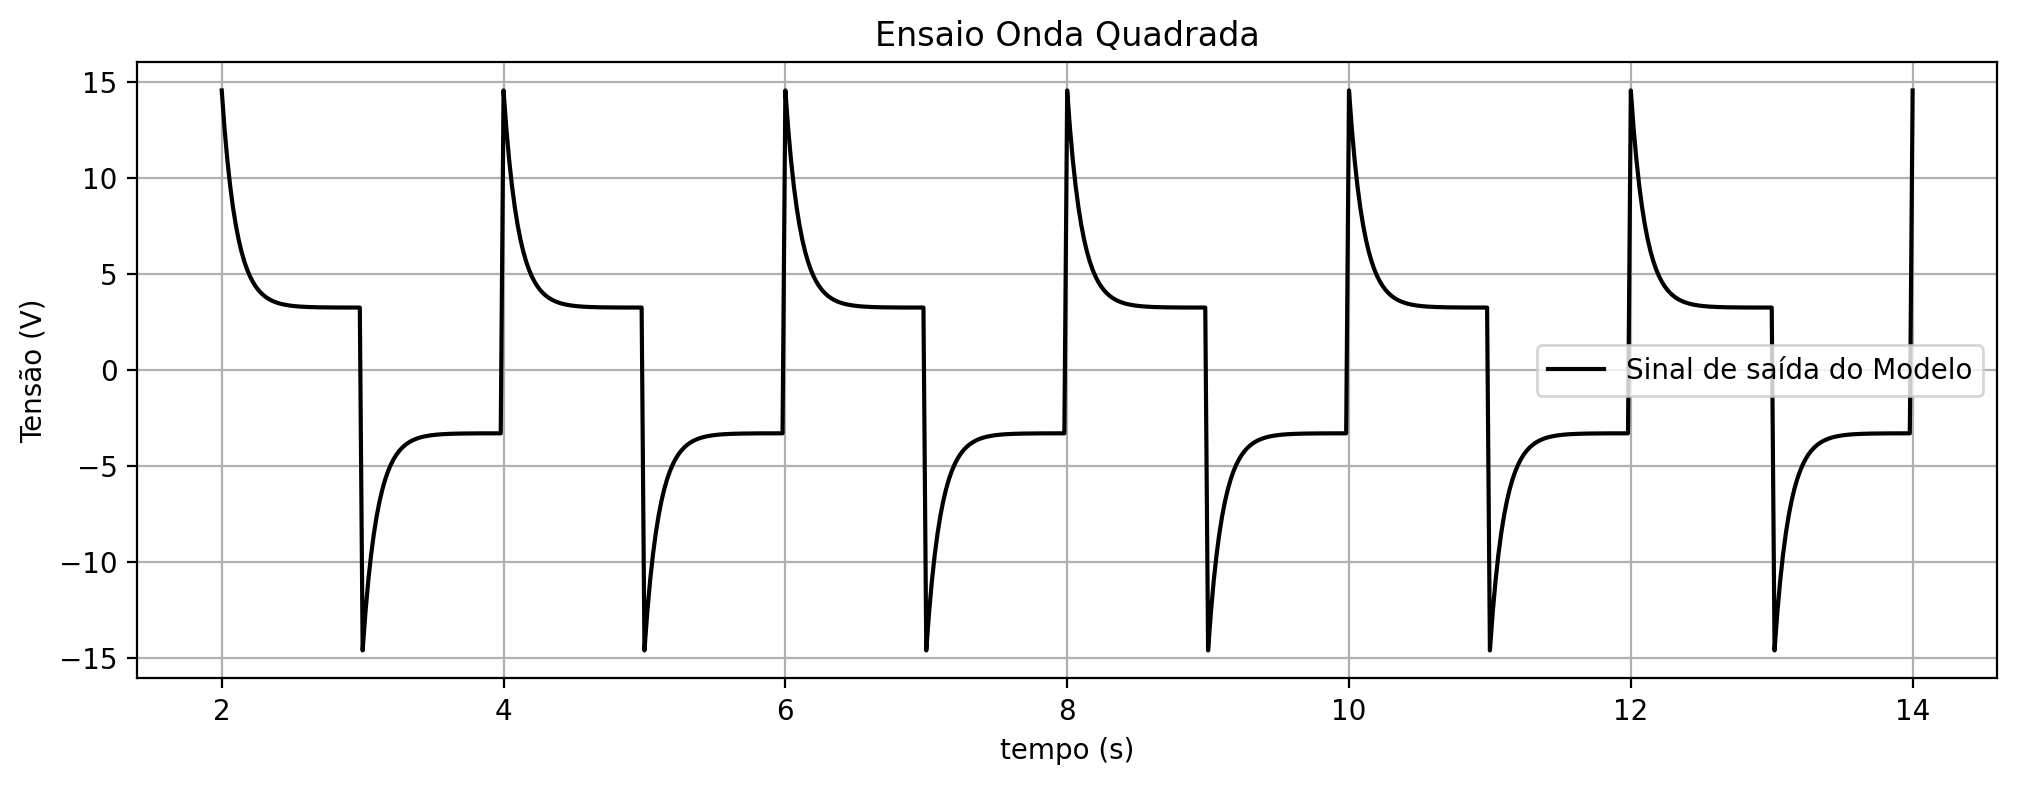

In [45]:
Us = ct.feedback(Gc_s, Gs, -1)

tempo1, saida_modelo = ct.forced_response(Us, T=tempo, U=sinal_entrada)


# Tirando a média para subtrair o Nível DC do modelo
nivel_dc_modelo = np.mean(saida_modelo[janela])
saida_sem_dc_modelo = saida_modelo[janela] - nivel_dc_modelo

# Plotagem dos gráficos dos sinais de entrada e saída sem nível DC
plt.figure(figsize=(12, 4))
#plt.plot(tempo[janela],r[janela], c = 'b', label = "Sinal de Entrada")
# plt.plot(tempo[janela], y[janela], 'r', label = "Sinal de saída Bancada")
plt.plot(tempo[janela], saida_sem_dc_modelo, 'k', label = "Sinal de saída do Modelo")

plt. title('Ensaio Onda Quadrada')
plt.ylabel('Tensão (V)')
plt.xlabel('tempo (s)')
plt.legend()
plt.grid()
plt.show()

In [46]:
import sympy as sp

In [50]:
s, kc, km, tau = sp.symbols('s kc km tau')